# Rock, Paper, Scissors Image Classification
02/11/2020


## Profile
Nama : Zikri Endisyah Munandar

E-Mail Address : azizikri15@gmail.com

Kelas : Machine Learning Untuk Pemula

Link Profile Dicoding : https://www.dicoding.com/users/azizikri

Import Package yang akan dipakai

In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt



print(tf.__version__)

2.3.0


Download datasets dengan menggunakan wget

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 05:40:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.9MB/s    in 29s     

2020-11-02 05:40:44 (10.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Pengekstrakan zip dan pendeklarasian variable dir

In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/rockpaperscissors/rps-cv-images'

Image Augmentation dan Validation Split

In [4]:
 train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    vertical_flip=True,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split= 0.4,
                    )

Generator 'train' dan 'validation' dan pembagian data untuk training dan validation

In [5]:
train_generator = train_datagen.flow_from_directory(
       dir,  
       target_size=(130, 130), 
       class_mode='categorical',
       subset = 'training',
    )

validation_generator = train_datagen.flow_from_directory(
       dir,  
       target_size=(130, 130), 
       class_mode='categorical',
       subset='validation',
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Pembuatan CNN dengan Model Sequential dan Summary dari CNN tersebut

In [6]:
model = tf.keras.Sequential([
   tf.keras.layers.AveragePooling2D(6,3, input_shape=(130,130,3)),
   tf.keras.layers.Conv2D(64, 3, activation='relu'),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Conv2D(32, 3, activation='relu'),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Conv2D(16, 3, activation='relu'),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 42, 42, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0

Compile function, pendeklarasian callback "EarlyStopping" dan Melatih Model CNN

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.0, epsilon=1e-07,
        centered=False,
        name='RMSprop'),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callback = EarlyStopping(
    monitor='accuracy',
    mode='max',
    patience=7,
    verbose=1
     )

latih = model.fit(
               train_generator,
               epochs=50,
               validation_data = validation_generator,
               validation_steps=5,
               callbacks=[callback],
               verbose=1,
        )

Epoch 1/50
42/42 [==============================] - 8s 186ms/step - loss: 1.0656 - accuracy: 0.4155 - val_loss: 0.9259 - val_accuracy: 0.5562
Epoch 2/50
42/42 [==============================] - 8s 179ms/step - loss: 0.9004 - accuracy: 0.6210 - val_loss: 0.6484 - val_accuracy: 0.7875
Epoch 3/50
42/42 [==============================] - 7s 178ms/step - loss: 0.5985 - accuracy: 0.7641 - val_loss: 0.3418 - val_accuracy: 0.8875
Epoch 4/50
42/42 [==============================] - 8s 179ms/step - loss: 0.4342 - accuracy: 0.8356 - val_loss: 0.3487 - val_accuracy: 0.8813
Epoch 5/50
42/42 [==============================] - 7s 177ms/step - loss: 0.3748 - accuracy: 0.8600 - val_loss: 0.2860 - val_accuracy: 0.9250
Epoch 6/50
42/42 [==============================] - 7s 178ms/step - loss: 0.3466 - accuracy: 0.8767 - val_loss: 0.1365 - val_accuracy: 0.9563
Epoch 7/50
42/42 [==============================] - 7s 177ms/step - loss: 0.3128 - accuracy: 0.8828 - val_loss: 0.3192 - val_accuracy: 0.8813
Epoch 

Mengevaluasi Keakuratan dari Model diatas

In [8]:
model.evaluate(validation_generator)

28/28 [==============================] - 4s 152ms/step - loss: 0.0758 - accuracy: 0.9828


[0.07579503208398819, 0.9828375577926636]

Memprediksi Gambar dengan mengupload gambar yang akan diprediksi

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (2).png
Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6 (1).png
Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (2).png


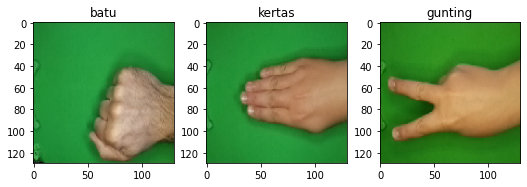

In [9]:
%matplotlib inline
label = ''
i = 1
uploaded = files.upload()

fig = plt.figure(figsize=(15,15))

for fn in uploaded.keys():
   
   path = fn 
   img = image.load_img(path, target_size=(130,130))
   
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)
  

   images = np.vstack([x])
   classes = model.predict(images, batch_size=10)

   paper     = "[[1. 0. 0.]]"
   rock      = "[[0. 1. 0.]]"
   scissors  = "[[0. 0. 1.]]"
  
   result = np.array_str(classes) 

   if result == paper :
      label = 'kertas'
   elif result == rock :
      label = 'batu'
   elif result == scissors :
      label = 'gunting'
   else :
      label = 'unindentified'
  
   fig.add_subplot(5,5,i)
   plt.imshow(img)
   plt.title(label)
   i += 1

plt.show()      